In [3]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
import matplotlib. pyplot as plt

In [4]:
All_Positions = pd.read_csv('../Resources/final_file.csv')
QB_only = All_Positions[All_Positions['position_cleaned']=='QB']
QB_stats = QB_only[['player_id','passing_completions', 'total_combined_fantasy_points','total_passing_fantasy_points']]
QB_stats.dtypes

player_id                          int64
passing_completions                int64
total_combined_fantasy_points    float64
total_passing_fantasy_points     float64
dtype: object

In [5]:
QB_stats_cleaned = QB_stats.dropna()
QB_stats_cleaned

,player_id,passing_completions,total_combined_fantasy_points,total_passing_fantasy_points
22,6975,128,69.74,62.64
23,6975,35,11.18,10.48
26,14490,0,0.00,0.00
35,9636,2,-0.30,0.00
38,14580,159,76.62,61.72
...,...,...,...,...
990,14004,17,1.24,1.24
991,14004,26,10.86,9.36
1033,22087,0,5.80,0.00
1034,22087,0,10.90,0.00


In [6]:
#Select column 1 (passing_completions) as X
X = QB_stats_cleaned.iloc[:, 1:2].values
#print(X)
#Select column 3 (total_passing_fantasy_points) as y
y = QB_stats_cleaned.iloc[:, 3].values
#print(y)

In [7]:
from sklearn.ensemble import RandomForestRegressor
#make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [8]:
#Predict a new result
#y_pred = regressor.predict()

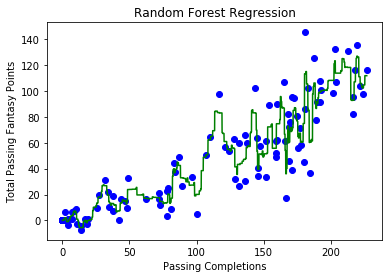

In [9]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'blue')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Passing Completions')
plt.ylabel('Total Passing Fantasy Points')
plt.show()

In [10]:
#Clean data for wide receiver positioin
WR_only = All_Positions[All_Positions['position_cleaned']=='WR']
WR_stats = WR_only[['player_id','receiving_yards', 'total_receiving_fantasy_points']]
WR_stats.dtypes

player_id                           int64
receiving_yards                     int64
total_receiving_fantasy_points    float64
dtype: object

In [11]:
WR_stats_cleaned = WR_stats.dropna()
WR_stats_cleaned

,player_id,receiving_yards,total_receiving_fantasy_points
0,19449,117,22.7
1,19449,343,72.3
4,15657,52,14.2
5,15657,81,14.1
6,10157,108,24.8
...,...,...,...
1049,10523,6,1.6
1051,7063,34,6.4
1052,7063,21,5.1
1053,13822,239,50.9


In [12]:
#Select column 1 (receiving_yards) as X
X = WR_stats_cleaned.iloc[:, 1:2].values

#Select column 2 (total_passing_fantasy_points) as y
y = WR_stats_cleaned.iloc[:, 2].values

#make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

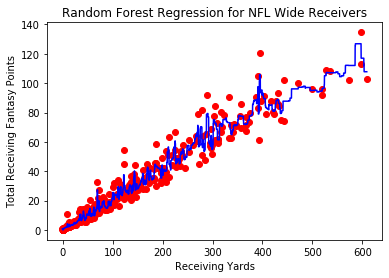

In [13]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'red')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression for NFL Wide Receivers')
plt.xlabel('Receiving Yards')
plt.ylabel('Total Receiving Fantasy Points')
plt.show()

In [33]:
#Clean data for running back positioin
RB_only = All_Positions[All_Positions['position_cleaned']=='RB']
RB_stats = WR_only[['player_id','rushing_yards', 'rushing_touchdowns','total_rushing_fantasy_points', 'rushing_attempts']]
RB_stats_cleaned = RB_stats.dropna()
RB_stats_cleaned

,player_id,rushing_yards,rushing_touchdowns,total_rushing_fantasy_points,rushing_attempts
0,19449,0,0,0.0,0
1,19449,0,0,0.0,0
4,15657,-5,0,-0.5,1
5,15657,0,0,0.0,0
6,10157,0,0,0.0,0
...,...,...,...,...,...
1049,10523,0,0,0.0,0
1051,7063,0,0,0.0,0
1052,7063,0,0,0.0,0
1053,13822,0,0,0.0,0


In [20]:
#Select column 1 (rushing_yards) as X
X = RB_stats_cleaned.iloc[:, 1:2].values

#Select column 3 (total_rushing_fantasy_points) as y
y = RB_stats_cleaned.iloc[:, 3].values

#make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

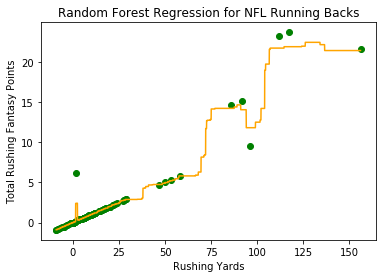

In [21]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'green')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'orange')
plt.title('Random Forest Regression for NFL Running Backs')
plt.xlabel('Rushing Yards')
plt.ylabel('Total Rushing Fantasy Points')
plt.show()

In [29]:
#Select column 2 (rushing_yards) as X
X = RB_stats_cleaned.iloc[:, 2:3].values
#X
#Select column 3 (total_rushing_fantasy_points) as y
y = RB_stats_cleaned.iloc[:, 3].values

#make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

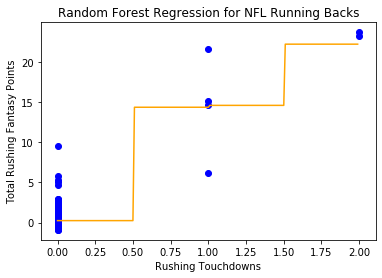

In [30]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'blue')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'orange')
plt.title('Random Forest Regression for NFL Running Backs')
plt.xlabel('Rushing Touchdowns')
plt.ylabel('Total Rushing Fantasy Points')
plt.show()

In [36]:
#Select column 1 (rushing_yards) as X
X = RB_stats_cleaned.iloc[:, 1:2].values
#X
#Select column 4 (rushing attempts) as y
y = RB_stats_cleaned.iloc[:, 4].values
#y
# #make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# #fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

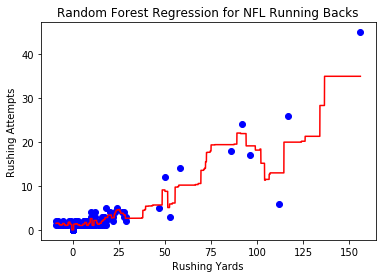

In [37]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'blue')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
plt.title('Random Forest Regression for NFL Running Backs')
plt.xlabel('Rushing Yards')
plt.ylabel('Rushing Attempts')
plt.show()

In [39]:
#Select column 4 (rushing_attempts) as X
X = RB_stats_cleaned.iloc[:, 4:5].values
#X
#Select column 3 (total_rushing_fantasy_points) as y
y = RB_stats_cleaned.iloc[:, 3].values

#make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

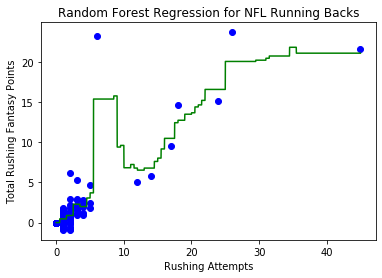

In [40]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'blue')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'green')
plt.title('Random Forest Regression for NFL Running Backs')
plt.xlabel('Rushing Attempts')
plt.ylabel('Total Rushing Fantasy Points')
plt.show()